In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import re
from nltk.stem import PorterStemmer,WordNetLemmatizer
nltk.download('stopwords')
from nltk.corpus import stopwords
Stop_words = set(stopwords.words('english'))


from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, precision_score,classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mmakn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# !pip install xgboost

In [3]:
df = pd.read_csv("amazon_alexa.tsv", delimiter = '\t', quoting = 3)

In [4]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [5]:
df.tail()

,rating,date,variation,verified_reviews,feedback
3145,5,30-Jul-18,Black Dot,"""Perfect for kids, adults and everyone in betw...",1
3146,5,30-Jul-18,Black Dot,"""Listening to music, searching locations, chec...",1
3147,5,30-Jul-18,Black Dot,"""I do love these things, i have them running m...",1
3148,5,30-Jul-18,White Dot,"""Only complaint I have is that the sound quali...",1
3149,4,29-Jul-18,Black Dot,Good,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [7]:
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [8]:
df.describe(include = 'O')

,date,variation,verified_reviews
count,3150,3150,3149
unique,77,16,2300
top,30-Jul-18,Black Dot,
freq,1603,516,79


In [9]:
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [10]:
df.dropna(inplace = True)

In [11]:
df.isna().any().sum()

0

In [12]:
df.columns.values

array(['rating', 'date', 'variation', 'verified_reviews', 'feedback'],
      dtype=object)

In [13]:
df.duplicated().sum()

715

In [14]:
df.drop_duplicates(inplace = True)

In [15]:
df.sample(5)

,rating,date,variation,verified_reviews,feedback
2054,5,10-Jul-18,Black Plus,I love the sound very good. We use it for home...,1
1946,5,26-Jul-18,White Plus,Nothing to dislike I love my new toy that has ...,1
1633,4,29-Jul-18,Black Show,"""Works well, pictures awesome! Sound could be ...",1
1950,4,26-Jul-18,Black Plus,It's like a remedial form of the Star Trek com...,1
2072,5,5-Jul-18,Black Plus,STILL TRYING TO LINK TO MY SON'S AND DAUGHTER'...,1


In [16]:
df.feedback.value_counts()

feedback
1    2214
0     220
Name: count, dtype: int64

In [17]:
df.rating.value_counts()

rating
5    1756
4     345
1     141
3     113
2      79
Name: count, dtype: int64

In [18]:
df[df['verified_reviews'].isna() == True]

,rating,date,variation,verified_reviews,feedback


In [19]:
df['Length'] = df['verified_reviews'].apply(len)

In [20]:
df.head()

,rating,date,variation,verified_reviews,feedback,Length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [21]:
print(f"Verified_reviews column values :\n{df.iloc[10]['verified_reviews']}")
print("=="*10)
print(f"Length of Reviews :{len(df.iloc[10]['verified_reviews'])}")
print("=="*10)
print(f"Length column values is :{df.iloc[10]['Length']}")

Verified_reviews column values :
"I sent it to my 85 year old Dad, and he talks to it constantly."
Length of Reviews :65
Length column values is :65


In [22]:
df.shape

(2434, 6)

In [23]:
df.size

14604

In [24]:
df.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
Length               int64
dtype: object

In [25]:
# lets check How many rows do we have :
len(df)

2434

In [26]:
df.shape[0]

2434

# Analyze Rating Column:

In [27]:
print(f"Rating value counts are :\n{df['rating'].value_counts()}")

Rating value counts are :
rating
5    1756
4     345
1     141
3     113
2      79
Name: count, dtype: int64


# Lets check these values using Bar plot and Pie chart:

In [28]:
sns.set(style = 'darkgrid')
# plt.figure(figsize = (10, 10), facecolor = 'white')
# df['rating'].value_counts().plot.bar()


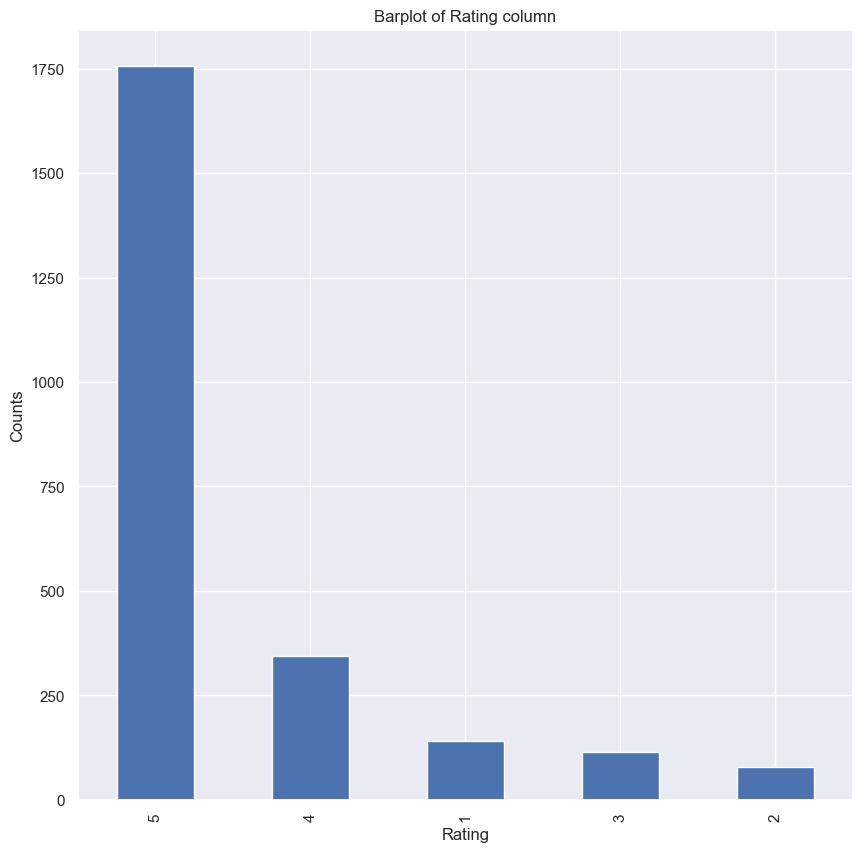

In [29]:
plt.figure(figsize= (10, 10), facecolor = 'white')
df['rating'].value_counts().plot.bar()
plt.title("Barplot of Rating column")
plt.xlabel("Rating")
plt.ylabel("Counts")
plt.show()

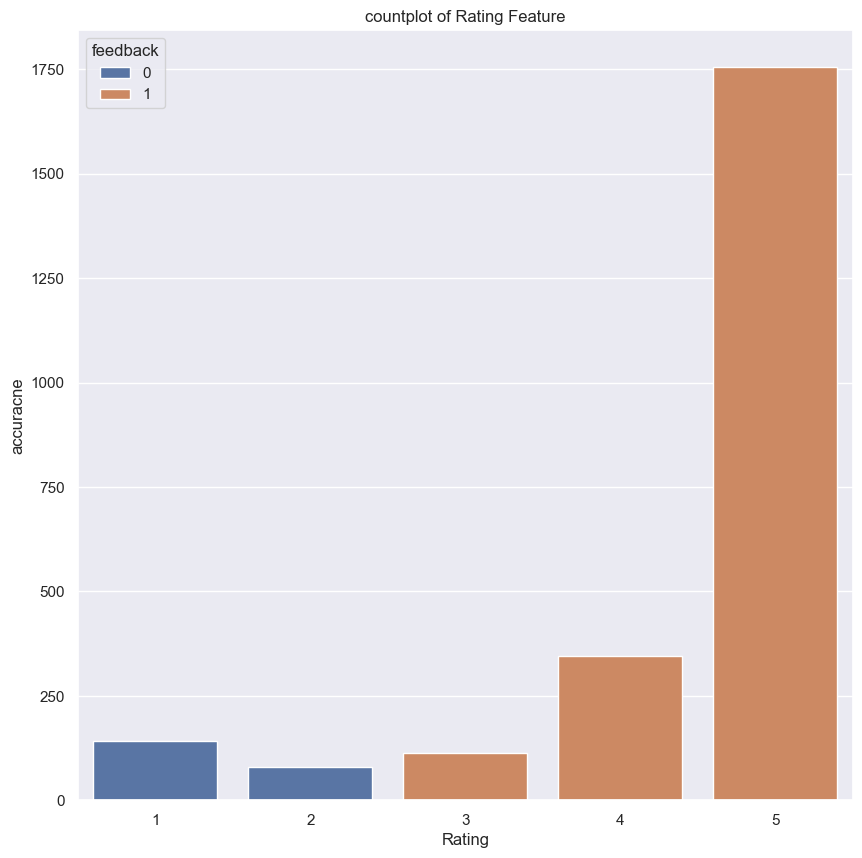

In [30]:
plt.figure(figsize=(10, 10), facecolor= 'white')
sns.countplot(x = df['rating'],hue = df['feedback'])
plt.title("countplot of Rating Feature")
plt.xlabel("Rating")
plt.ylabel("accuracne")
plt.show()

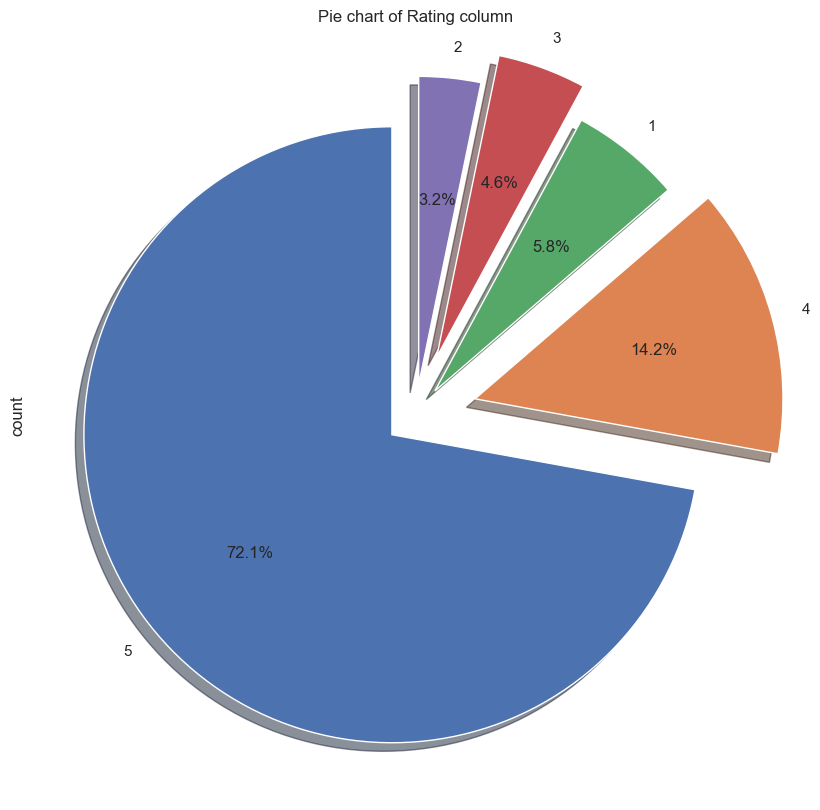

In [31]:
plt.figure(figsize= (10, 10), facecolor = 'white')
vc= df['rating'].value_counts()
vc.plot(kind = 'pie', autopct = '%1.1f%%', explode = (0.1,0.2,0.1,0.2,0.1), startangle = 90, shadow = True)
plt.title("Pie chart of Rating column")
plt.show()

In [32]:
print(f"Rating values in percentages is :\n{round(df['rating'].value_counts()/df.shape[0]*100, 2)}")

Rating values in percentages is :
rating
5    72.14
4    14.17
1     5.79
3     4.64
2     3.25
Name: count, dtype: float64


# Analyzingg Feedback columns:

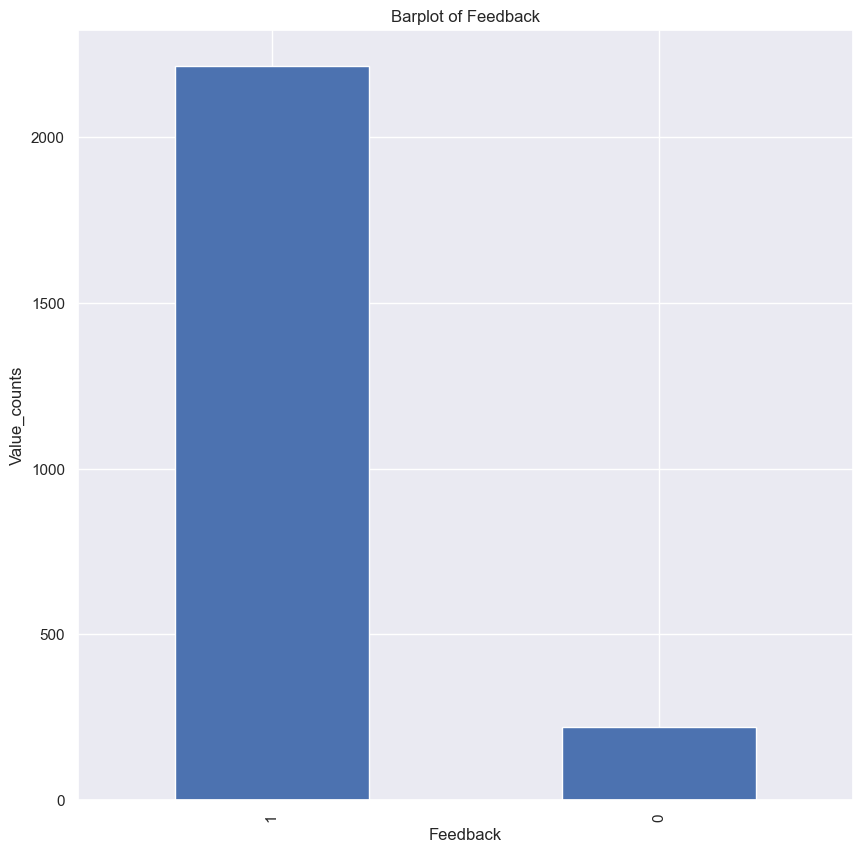

In [33]:
plt.figure(figsize = (10, 10), facecolor = 'white')
df['feedback'].value_counts().plot.bar()
plt.title("Barplot of Feedback")
plt.xlabel("Feedback")
plt.ylabel("Value_counts")
plt.show()

In [34]:
print(f"Feedback column value_counts :\n{df['feedback'].value_counts()}")

Feedback column value_counts :
feedback
1    2214
0     220
Name: count, dtype: int64


In [35]:
print(f"Feedback column value counts in percentages : \n{round(df['feedback'].value_counts()/df.shape[0]*100,2)}")

Feedback column value counts in percentages : 
feedback
1    90.96
0     9.04
Name: count, dtype: float64


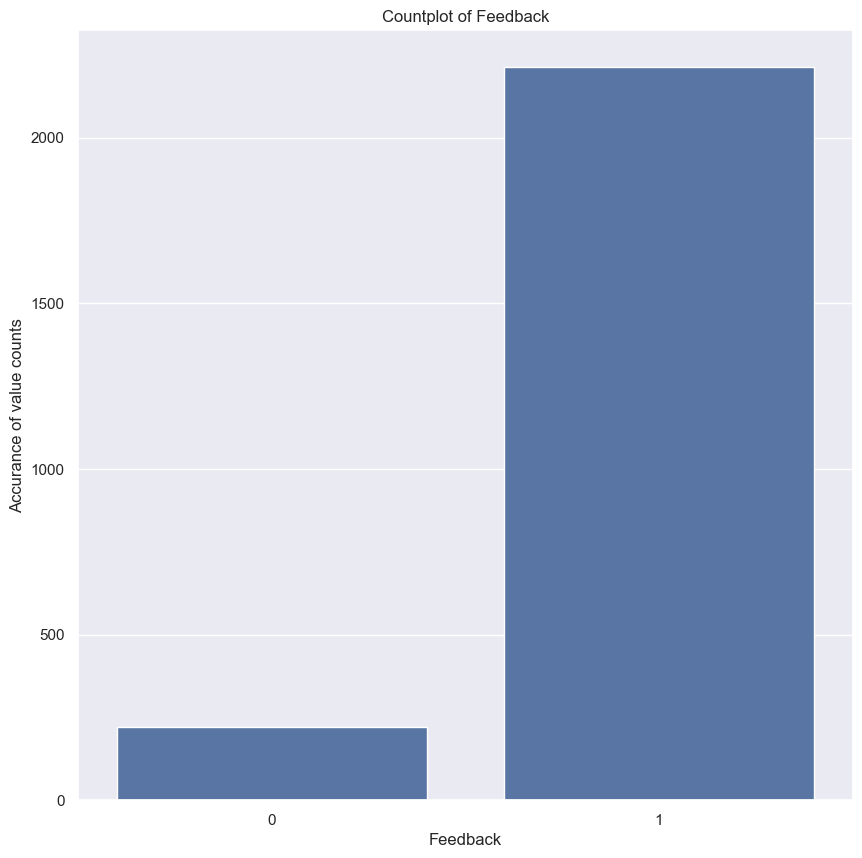

In [36]:
plt.figure(figsize=(10, 10), facecolor = 'white')
sns.countplot(x= df['feedback'])
plt.title("Countplot of Feedback")
plt.xlabel("Feedback")
plt.ylabel("Accurance of value counts")
plt.show()

In [37]:
reviews_0 = df[df['feedback']==0]['verified_reviews']

In [38]:
reviews_1= df[df['feedback']== 1]['verified_reviews']

In [39]:
reviews_0_ = df[df['feedback']==0].iloc[1]['verified_reviews']
reviews_1_ = df[df['feedback']==1].iloc[1]['verified_reviews']

In [40]:
print(reviews_0_)

Sound is terrible if u want good music too get a bose


In [41]:
print(reviews_1_)

Loved it!


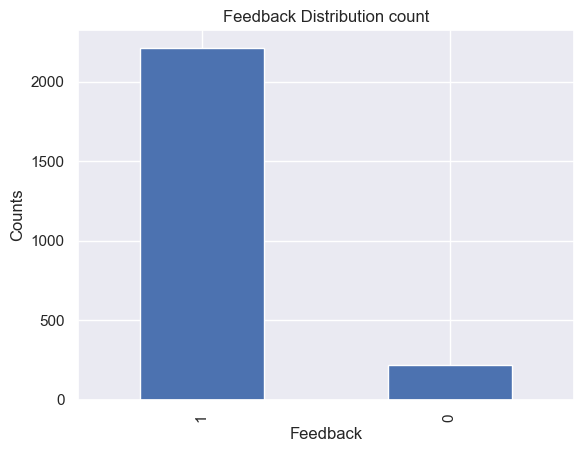

In [42]:
df['feedback'].value_counts().plot.bar()
plt.title("Feedback Distribution count")
plt.xlabel("Feedback")
plt.ylabel("Counts")
plt.show()

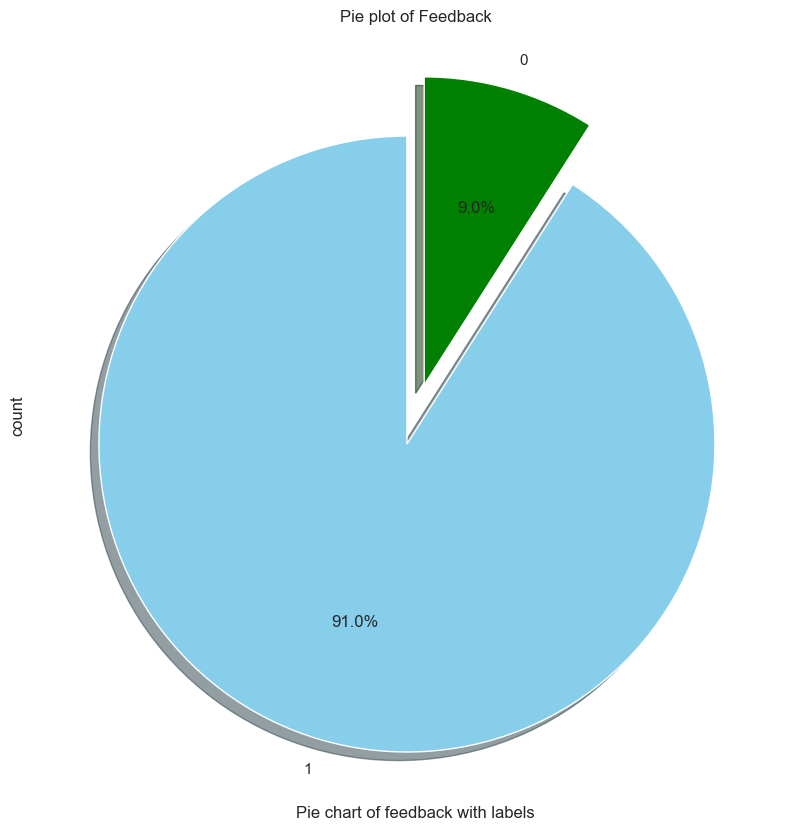

In [43]:
plt.figure(figsize = (10, 10), facecolor = 'white')
colors = ("skyBlue","green")
vc = df['feedback'].value_counts()
vc.plot(kind = 'pie', autopct = '%1.1f%%', explode = (0.1, 0.1),colors = colors ,startangle = 90, shadow = True)
plt.title("Pie plot of Feedback")
plt.xlabel("Pie chart of feedback with labels")
plt.show()

In [44]:
df[df['feedback']== 0]['rating'].value_counts()

rating
1    141
2     79
Name: count, dtype: int64

In [45]:
df[df['feedback']==1]['rating'].value_counts()

rating
5    1756
4     345
3     113
Name: count, dtype: int64

# Analyzing Variation columns:

In [46]:
print(f"The value counts of variation :\n{df['variation'].value_counts()}")

The value counts of variation :
variation
Configuration: Fire TV Stick    342
Black  Plus                     270
Black                           261
Black  Show                     260
Black  Dot                      252
Black  Spot                     241
Charcoal Fabric                 219
White  Spot                     108
White  Dot                       92
White                            90
White  Show                      85
Heather Gray Fabric              79
White  Plus                      78
Sandstone Fabric                 45
Oak Finish                        7
Walnut Finish                     5
Name: count, dtype: int64


In [47]:
print(f"Percentages of variation value_counts :\n {round(df['variation'].value_counts()/df.shape[0]*100,2)}")

Percentages of variation value_counts :
 variation
Configuration: Fire TV Stick    14.05
Black  Plus                     11.09
Black                           10.72
Black  Show                     10.68
Black  Dot                      10.35
Black  Spot                      9.90
Charcoal Fabric                  9.00
White  Spot                      4.44
White  Dot                       3.78
White                            3.70
White  Show                      3.49
Heather Gray Fabric              3.25
White  Plus                      3.20
Sandstone Fabric                 1.85
Oak Finish                       0.29
Walnut Finish                    0.21
Name: count, dtype: float64


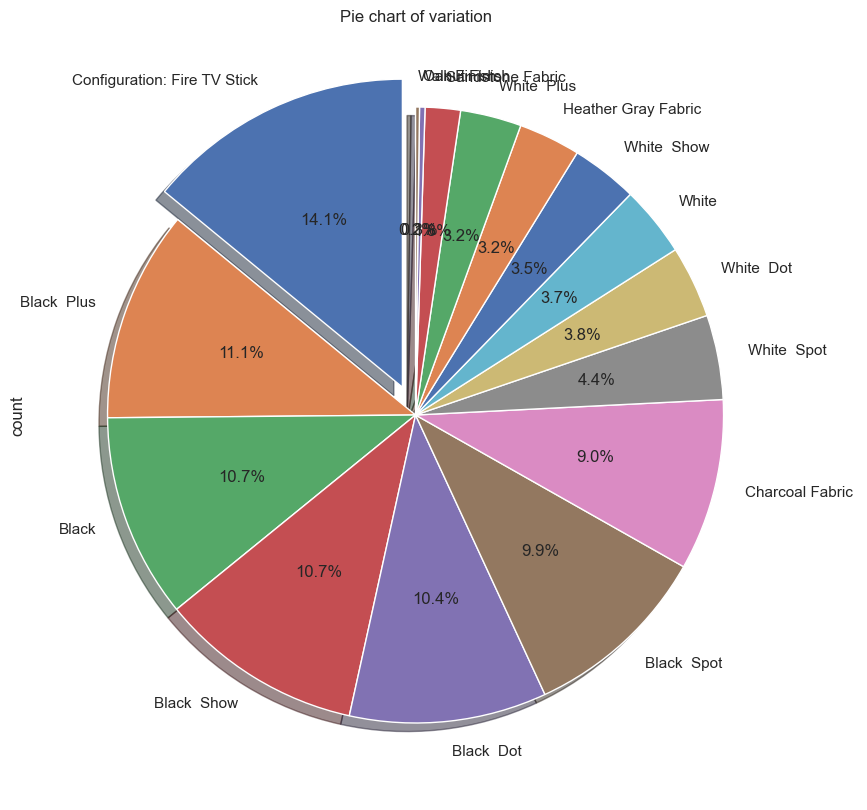

In [48]:
plt.figure(figsize = (10,10), facecolor = 'white')
explode = [0.1 if i == 0 else 0 for i in range(0, 16)]
vc = df['variation'].value_counts()
vc.plot(kind = 'pie', autopct = '%1.1f%%', explode = explode, startangle = 90, shadow= True)
plt.title("Pie chart of variation")
plt.xticks(rotation = 45)
plt.show()

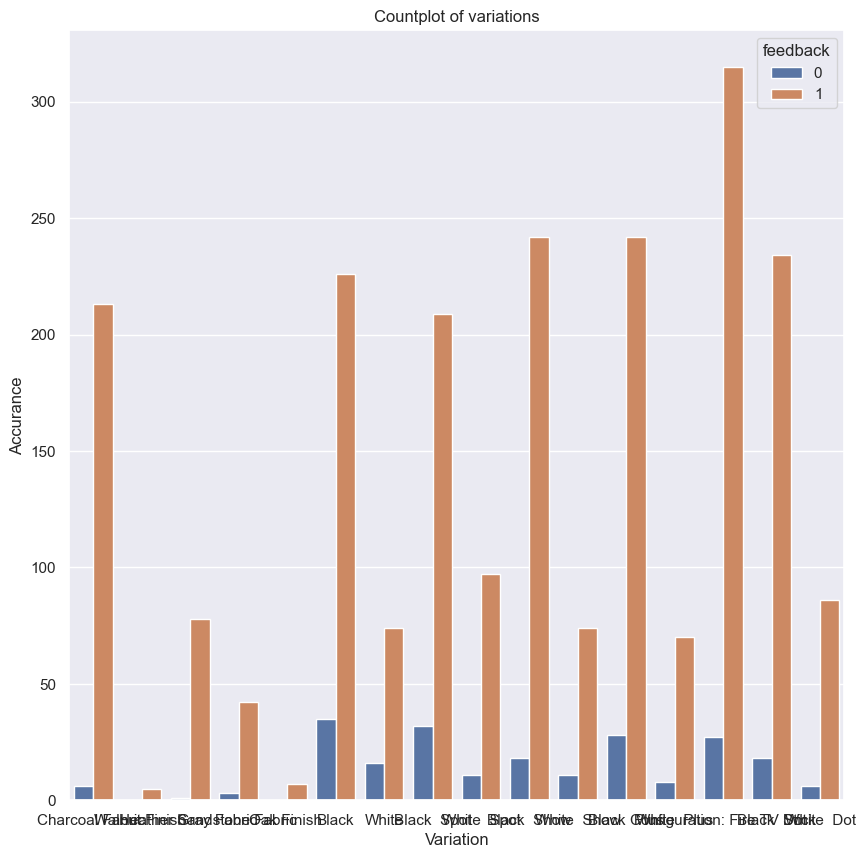

In [49]:
plt.figure(figsize = (10, 10,), facecolor = 'white')
sns.countplot(x = df['variation'], hue = df['feedback'])
plt.title("Countplot of variations")
plt.xlabel("Variation")
plt.ylabel("Accurance")
plt.show()

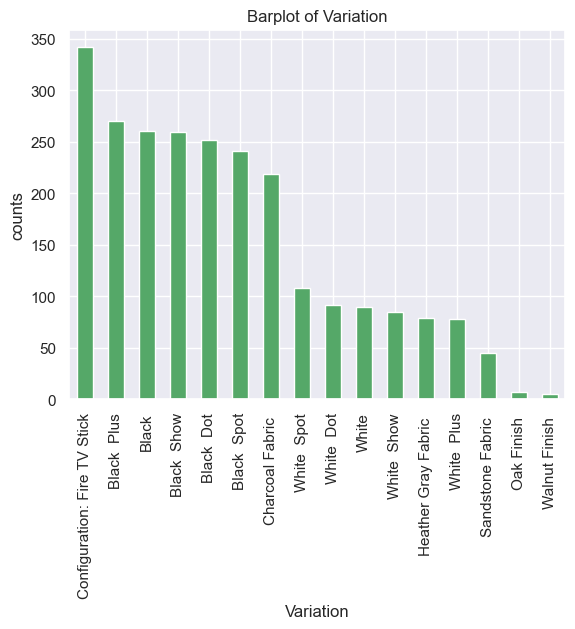

In [50]:
df['variation'].value_counts().plot.bar(color = 'g')
plt.title("Barplot of Variation")
plt.xlabel("Variation")
plt.ylabel("counts")
plt.show(
)

In [51]:
df.groupby('variation')['rating'].mean()

variation
Black                           4.233716
Black  Dot                      4.452381
Black  Plus                     4.370370
Black  Show                     4.480769
Black  Spot                     4.311203
Charcoal Fabric                 4.735160
Configuration: Fire TV Stick    4.590643
Heather Gray Fabric             4.696203
Oak Finish                      4.857143
Sandstone Fabric                4.355556
Walnut Finish                   4.800000
White                           4.166667
White  Dot                      4.423913
White  Plus                     4.358974
White  Show                     4.282353
White  Spot                     4.342593
Name: rating, dtype: float64

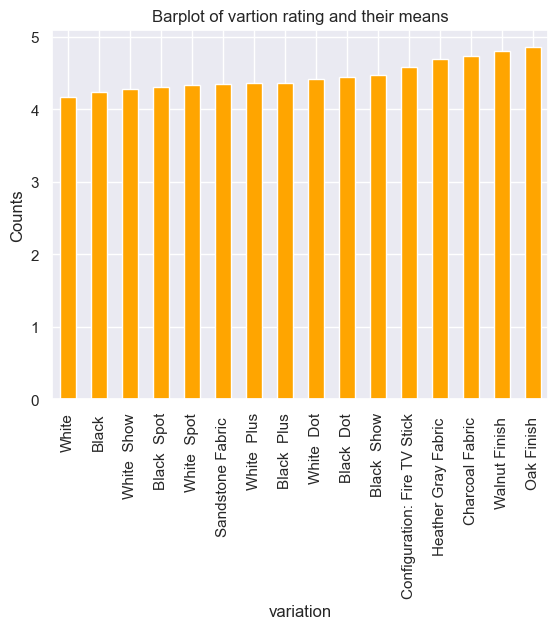

In [52]:
df.groupby('variation')['rating'].mean().sort_values().plot.bar(color ='orange')
plt.title("Barplot of vartion rating and their means")
plt.xlabel("variation")
plt.ylabel("Counts")
plt.show()

# Analyzing Length columns:

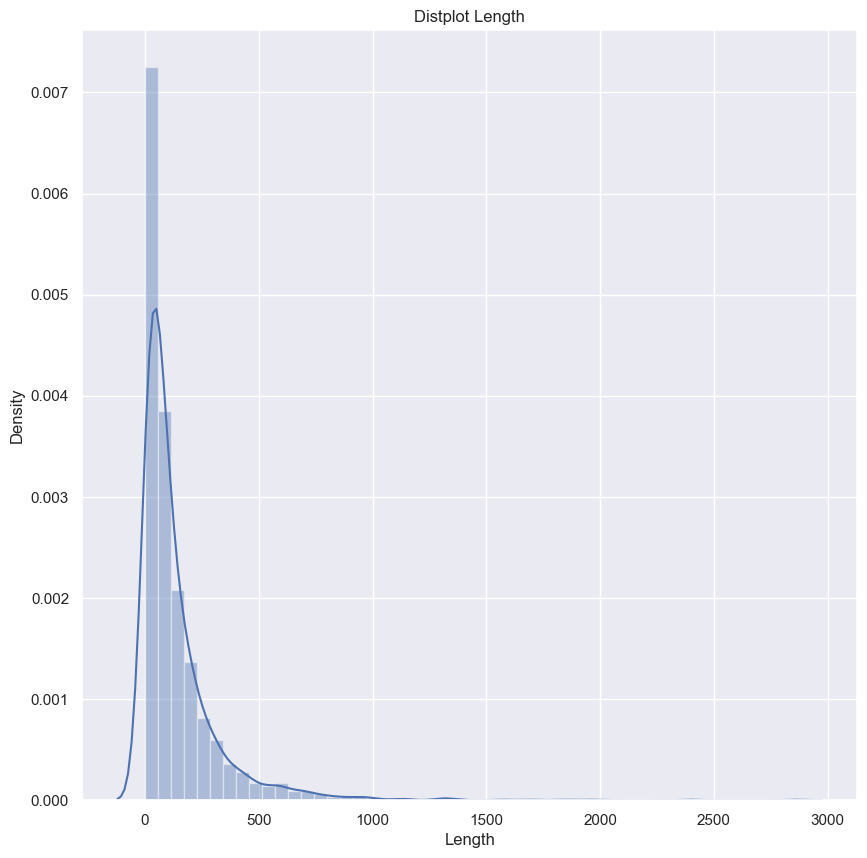

In [53]:
plt.figure(figsize = (10, 10), facecolor = 'white')
sns.distplot(df['Length'])
plt.title("Distplot Length")
plt.show()

[Text(0.5, 1.0, 'Distribution of length of reviews')]

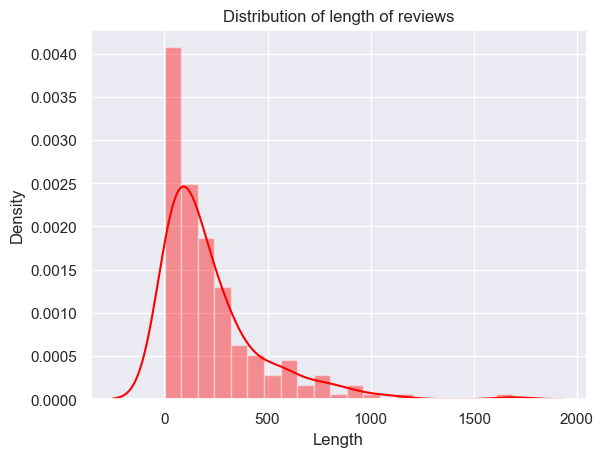

In [54]:
sns.distplot(df[df['feedback']== 0]['Length'], color = 'red').set(title= "Distribution of length of reviews")

[Text(0.5, 1.0, 'Distribution of Length having feedback 1')]

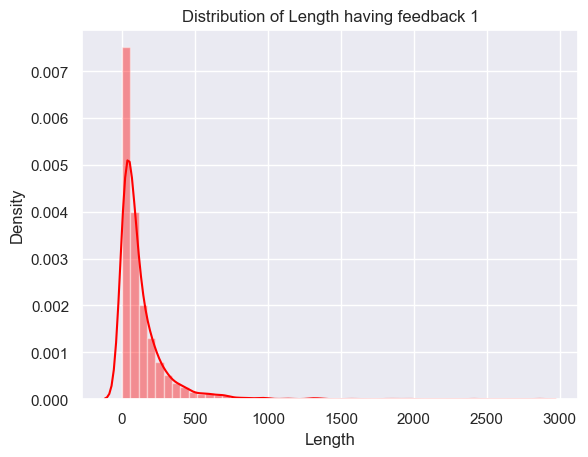

In [55]:
sns.distplot(df[df['feedback']== 1]['Length'], color = 'red').set(title= "Distribution of Length having feedback 1")

In [56]:
# cv = CountVectorizer(stop_words='english')
# words = cv.fit_transform(df.verified_reviews)

In [57]:
cv=  CountVectorizer(stop_words='english')
word= cv.fit_transform(df.verified_reviews)

In [58]:
reviews = " ".join([review for review in df['verified_reviews']])

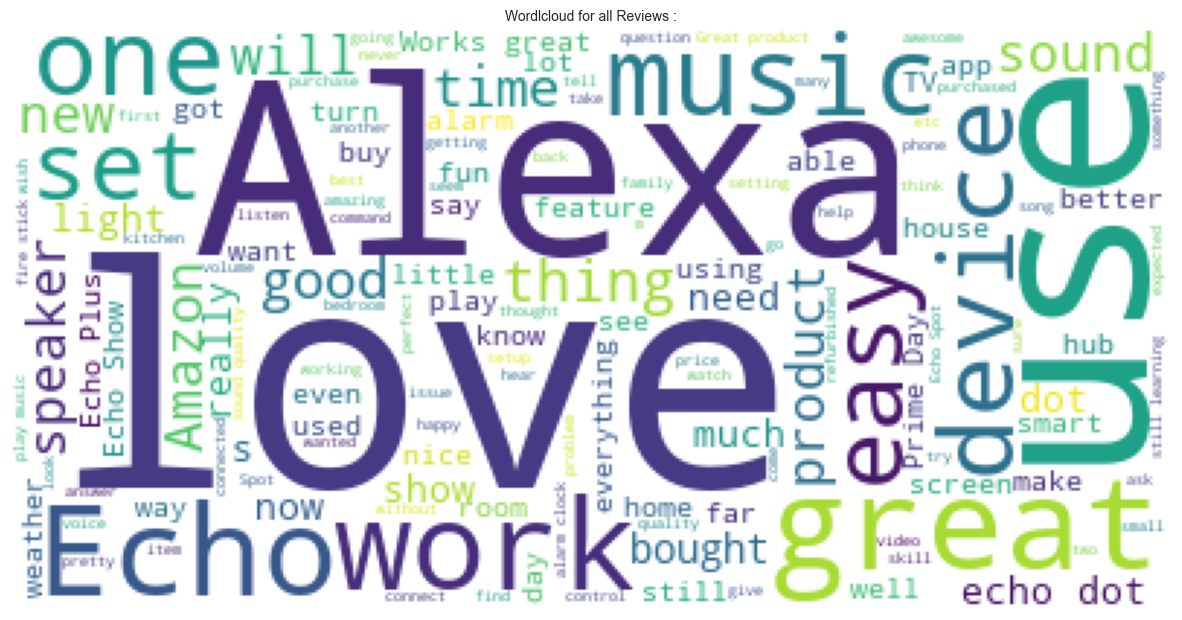

In [59]:
wc = WordCloud(background_color='white', max_words=1000)

plt.figure(figsize = (15, 20))
plt.imshow(wc.generate(reviews))
plt.title("Wordlcloud for all Reviews :", fontsize= 10)
plt.axis("off")
plt.show()

In [60]:
negative_reviews= " ".join([review for review in df[df['feedback'] ==0]['verified_reviews']])
negative_reviews = negative_reviews.lower().split()
# print(negative_reviews)

In [61]:
positive_reviews = " ".join([review for review in df[df['feedback']==1]['verified_reviews']])
positive_reviews = positive_reviews.lower().split()
# print(positive_reviews)

We find **unique positive** and **unique negative** words to identify specific terms that appear only in one feedback category (positive or negative). This helps understand what language or keywords are associated with each type of feedback, which can be useful for sentiment analysis or model training.

In [62]:
unique_negative = [x for x in negative_reviews if x not in positive_reviews]
unique_negative = " ".join(unique_negative)
# print(unique_negative)

In [63]:
unique_positive = [x for x in positive_reviews if x not in negative_reviews]
unique_positive = " ".join(unique_positive)
# print(unique_positive)

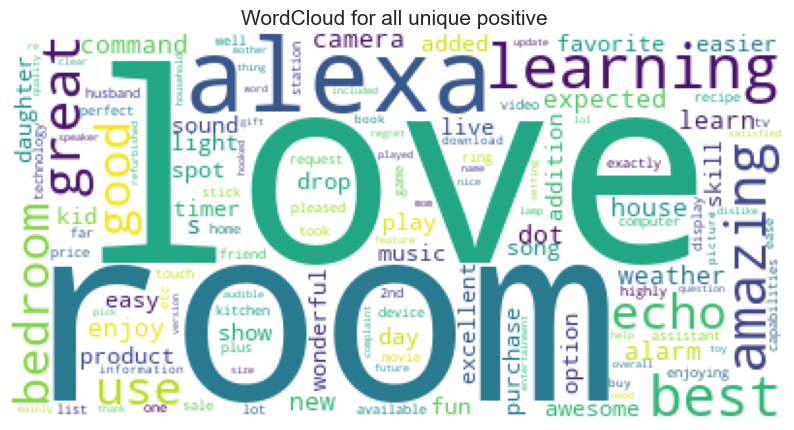

In [64]:
wc = WordCloud(background_color='white', max_words=1000)

plt.figure(figsize= (10, 11))
plt.imshow(wc.generate(unique_positive))
plt.title("WordCloud for all unique positive ", fontsize = 15)
plt.xlabel("Maximum words ::")
plt.axis("off")
plt.show()

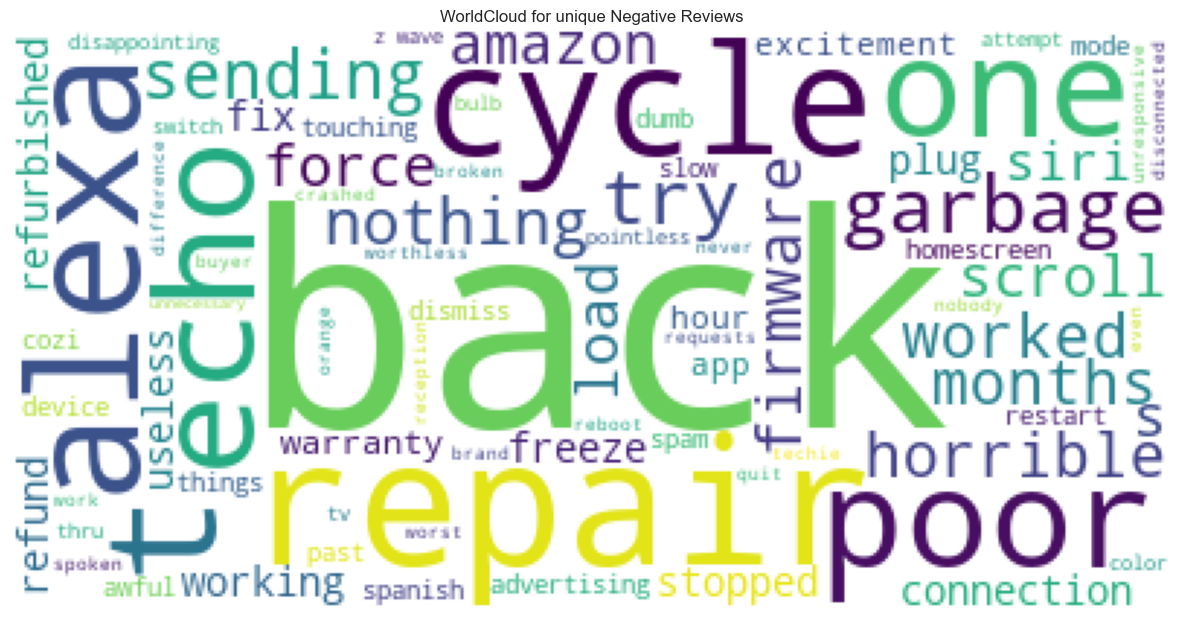

In [65]:
wc = WordCloud(background_color='white', max_words = 1000)

plt.figure(figsize = (15, 20))
plt.imshow(wc.generate(unique_negative))
plt.title("WorldCloud for unique Negative Reviews")
plt.xlabel("MAximum words")
plt.axis("off")
plt.show()

# Text PreProcessing and Text Modeling:

In [66]:
corpus = []
wl = WordNetLemmatizer()
for i in range(len(df)):
    text= re.sub(r'[^a-zA-Z]',' ', df.iloc[i]['verified_reviews'])
    text = text.lower()
    text = text.split()
    text_re = [wl.lemmatize(word) for word in df['verified_reviews'] if word not in Stop_words]
    text_re = " ".join(text_re)
    corpus.append(text_re)

In [67]:
cv = CountVectorizer(max_features=3000)

x = cv.fit_transform(corpus).toarray()

In [68]:
y = df['feedback'].values

In [69]:
# Check the shape of x and y:

In [70]:
print(f"The shape of x :{x.shape}")
print("=="*10)
print(f"The shape of y :{y.shape}")

The shape of x :(2434, 3000)
The shape of y :(2434,)


In [71]:
from collections import Counter
Counter(y)

Counter({1: 2214, 0: 220})

In [72]:
from sklearn.utils import resample

df_majority = df[df['feedback']==1]
df_minority = df[df['feedback']== 0]

df_minor_upsampling = resample(df_minority,
                              replace = True,
                              n_samples=(len(df_majority)),
                              random_state = 1233)

df_balanced = pd.concat([df_majority, df_minor_upsampling])

print(df_balanced['feedback'].value_counts())

feedback
1    2214
0    2214
Name: count, dtype: int64


In [73]:
len(df_balanced)

4428

In [74]:
y =df_balanced['feedback'].values

In [75]:
print(len(x))

2434


In [76]:
len(df_balanced['verified_reviews'])

4428

In [77]:
corpus_2= []
wl = WordNetLemmatizer()
for i in range(len(df_balanced)):
    text = re.sub(r'[^a-zA-Z]',' ',df_balanced.iloc[i]['verified_reviews'])
    text = text.lower()
    text = text.split()
    text_re = [wl.lemmatize(word) for word in text if word not in Stop_words]
    text_re = " ".join(text_re)
    corpus_2.append(text_re)

In [78]:
corpus_2[0]

'love echo'

In [79]:
corpus_2[2]

'sometimes playing game answer question correctly alexa say got wrong answer like able turn light away home'

In [80]:
df_balanced['verified_reviews'][2]

'"Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home."'

In [81]:
X = cv.fit_transform(corpus_2).toarray()

In [82]:
X.shape

(4428, 3000)

# Split the data into trainig and testing parts:

In [83]:
x_train, x_test,y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state=42)

In [84]:
print(f"Shape of x_train :{x_train.shape}")
print("=="*10)
print(f"Shape of x_test :{x_test.shape}")

Shape of x_train :(3542, 3000)
Shape of x_test :(886, 3000)


In [85]:
from collections import Counter
Counter(y)

Counter({1: 2214, 0: 2214})

# Model Building and Training:

In [86]:
rf= RandomForestClassifier(n_estimators=150)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=150)

In [87]:
y_pred = rf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       438
           1       0.98      0.95      0.96       448

    accuracy                           0.97       886
   macro avg       0.97      0.97      0.97       886
weighted avg       0.97      0.97      0.97       886



In [88]:
print(x_train.max())
print("=="*10)
print(x_test.max())

12
10


In [89]:
print(f"Training Accuracy : {rf.score(x_train, y_train):.2f}")
print("=="*10)
print(f"Testing Accuracy :{rf.score(x_test, y_test):.2f}")

Training Accuracy : 0.99
Testing Accuracy :0.97


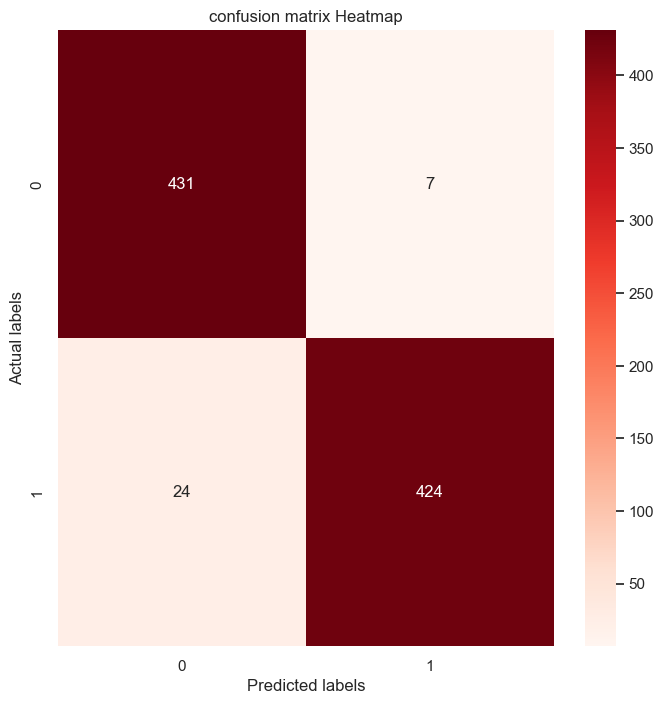

In [90]:
plt.figure(figsize = (8,8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot = True, fmt = 'd', cmap = plt.cm.Reds)
plt.title("confusion matrix Heatmap")
plt.xlabel("Predicted labels")
plt.ylabel("Actual labels")
plt.show()

# Hyperparameter tuning:

In [91]:
from sklearn.model_selection import RandomizedSearchCV
cv_s= StratifiedKFold(n_splits=5)
params = {
    "n_estimators":[100, 150, 200, 250, 300, 350,500],
    "max_depth":[None,10, 15,20,30, 40, 45],
    "bootstrap":[True, False],
    "min_samples_split":[2,4,5,8,12,14],
    "min_samples_leaf":[1,2,3,5]
}
rf = RandomForestClassifier()
gd_cv =RandomizedSearchCV(estimator=rf, param_distributions=params,cv=cv_s, verbose=3, scoring='f1',n_iter=100, random_state=42,refit=True)

In [92]:
gd_cv.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END bootstrap=False, max_depth=30, min_samples_leaf=3, min_samples_split=12, n_estimators=100;, score=0.878 total time=   7.0s
[CV 2/5] END bootstrap=False, max_depth=30, min_samples_leaf=3, min_samples_split=12, n_estimators=100;, score=0.919 total time=   6.8s
[CV 3/5] END bootstrap=False, max_depth=30, min_samples_leaf=3, min_samples_split=12, n_estimators=100;, score=0.891 total time=   7.6s
[CV 4/5] END bootstrap=False, max_depth=30, min_samples_leaf=3, min_samples_split=12, n_estimators=100;, score=0.892 total time=   8.9s
[CV 5/5] END bootstrap=False, max_depth=30, min_samples_leaf=3, min_samples_split=12, n_estimators=100;, score=0.896 total time=   7.2s
[CV 1/5] END bootstrap=True, max_depth=20, min_samples_leaf=5, min_samples_split=14, n_estimators=250;, score=0.832 total time=   6.9s
[CV 2/5] END bootstrap=True, max_depth=20, min_samples_leaf=5, min_samples_split=14, n_estimators=250;, score=0.866 total 

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 15, 20, 30, 40,
                                                      45],
                                        'min_samples_leaf': [1, 2, 3, 5],
                                        'min_samples_split': [2, 4, 5, 8, 12,
                                                              14],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300, 350, 500]},
                   random_state=42, scoring='f1', verbose=3)

In [93]:
gd_cv.best_params_

{'n_estimators': 350,
 'min_samples_split': 8,
 'min_samples_leaf': 2,
 'max_depth': None,
 'bootstrap': False}

In [94]:
gd_cv.best_score_

0.9461896031665938

In [95]:
rf = RandomForestClassifier(
n_estimators = 350,
min_samples_split = 8,
min_samples_leaf = 2,
max_depth = None,
bootstrap =  False)
rf.fit(x_train,y_train)
y_rf = rf.predict(x_test)
print(classification_report(y_test, y_rf))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       438
           1       0.93      0.98      0.95       448

    accuracy                           0.95       886
   macro avg       0.95      0.95      0.95       886
weighted avg       0.95      0.95      0.95       886



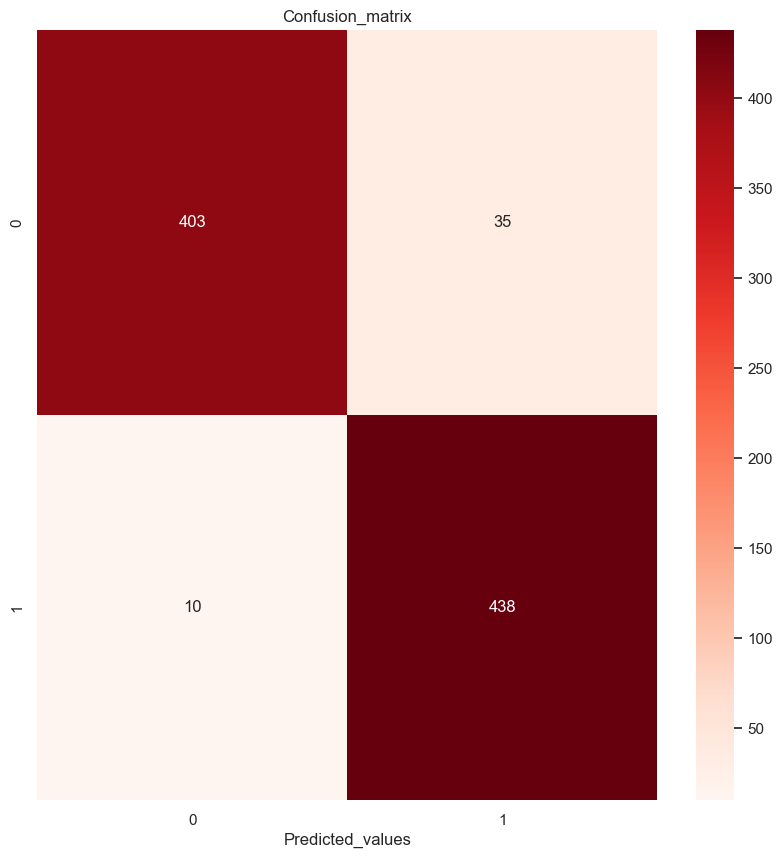

In [97]:
plt.figure(figsize = (10, 10))
con_met = confusion_matrix(y_test,y_rf)
sns.heatmap(con_met, annot = True, fmt= 'd', cmap=plt.cm.Reds)
plt.title("Confusion_matrix")
plt.xlabel("Predicted_values")
plt.show()

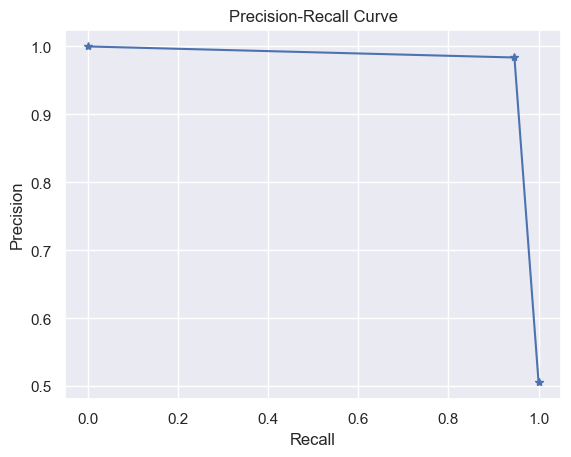

In [98]:
from sklearn.metrics import  precision_recall_curve
# # Assuming you have true labels y_true and predicted probabilities y_scores
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Plotting the Precision-Recall curve
plt.plot(recall, precision, marker='*')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Using MultinomialNB:

**MultinomialNB** (Multinomial Naive Bayes) is a classification algorithm used mainly for **text classification** problems, like spam detection or sentiment analysis. It works well with **discrete data**, such as word counts or term frequencies, making it suitable for tasks where input features represent counts or frequencies (e.g., bag-of-words or TF-IDF).

### How it works:
1. **Naive Bayes Assumption**: It assumes that features (like words in a document) are **conditionally independent**, meaning the presence of one word doesn't affect the presence of another.
2. **Multinomial Distribution**: It calculates the probability of each class by considering the **frequency** of features (words) in each class.
3. **Bayes Theorem**: It applies Bayes' Theorem to calculate the **posterior probability** of a class given the input data and chooses the class with the highest probability.

Here's the formula it uses:

\[
P(C \mid x_1, x_2, \dots, x_n) = \frac{P(C) \prod_{i=1}^{n} P(x_i \mid C)}{P(x_1, x_2, \dots, x_n)}
\]

Where:
- \(P(C \mid x_1, x_2, \dots, x_n)\) is the probability of class \(C\) given features \(x_1, x_2, \dots, x_n\).
- \(P(C)\) is the prior probability of the class.
- \(P(x_i \mid C)\) is the likelihood of feature \(x_i\) given class \(C\).

### When to use it:
- It’s great for **text data** (like bag-of-words models).
- Works well with **categorical features**.


In [99]:
from sklearn.naive_bayes import MultinomialNB

In [100]:
mn = MultinomialNB(alpha=0.5, fit_prior=True)

In [101]:
mn.fit(x_train, y_train)

MultinomialNB(alpha=0.5)

In [102]:
y_mn = mn.predict(x_test)
print(classification_report(y_test, y_mn))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       438
           1       0.94      0.92      0.93       448

    accuracy                           0.93       886
   macro avg       0.93      0.93      0.93       886
weighted avg       0.93      0.93      0.93       886



# DecisionTreeClassifier:

In [103]:
dt= DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [104]:
y_dt = dt.predict(x_test)
print(classification_report(y_test, y_dt))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       438
           1       1.00      0.88      0.93       448

    accuracy                           0.94       886
   macro avg       0.94      0.94      0.94       886
weighted avg       0.94      0.94      0.94       886



# XGBClassifier :

In [105]:
model_xg = XGBClassifier()
model_xg.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [106]:
xg_pred = model_xg.predict(x_test)
print(classification_report(y_test, xg_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       438
           1       0.99      0.88      0.93       448

    accuracy                           0.93       886
   macro avg       0.94      0.93      0.93       886
weighted avg       0.94      0.93      0.93       886



In [107]:
pd.crosstab(y_test, xg_pred)

col_0,0,1
row_0,,
0,433,5
1,55,393


In [108]:
print(f"Trainig score of model_xgb :{model_xg.score(x_train,y_train)}")
print("=="*10)
print(f"Testing score of model_xgb :{model_xg.score(x_test, y_test)}")

Trainig score of model_xgb :0.963579898362507
Testing score of model_xgb :0.9322799097065463


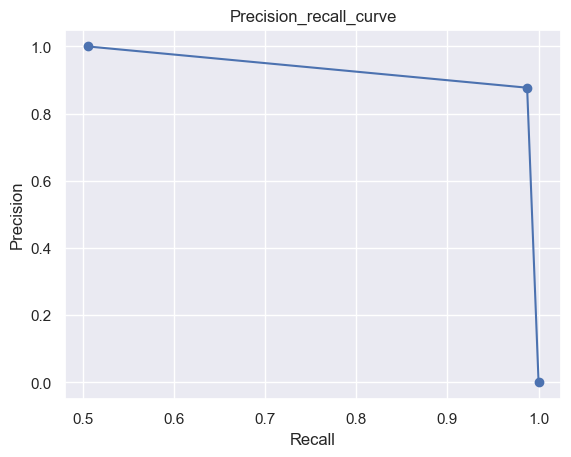

In [109]:
precision, recall, _  = precision_recall_curve(y_test, xg_pred)

plt.plot(precision, recall, marker = 'o')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision_recall_curve")
plt.show()

In [111]:
score = cross_val_score(model_xg, x_train, y_train, scoring='f1')

print(f"Cross_val_score :{score}")
print("=="*10)
print(f"Cross_val-score :{score.mean()}")
print("=="*10)
print(f"cross_val_score_std :{score.std()}")

Cross_val_score :[0.92145015 0.93834586 0.92378049 0.92749245 0.92771084]
Cross_val-score :0.9277559588054676
cross_val_score_std :0.005792843185869036


In [112]:
score = cross_val_score(rf, x_train, y_train, scoring='f1')

print(f"Cross_val_score :{score}")
print("=="*10)
print(f"Cross_val-score :{score.mean()}")
print("=="*10)
print(f"cross_val_score_std :{score.std()}")

Cross_val_score :[0.94133697 0.94277929 0.93188011 0.95688456 0.94214876]
Cross_val-score :0.9430059388235336
cross_val_score_std :0.007999648043343953
